1. What is Boosting in Machine Learning? Explain how it improves weak learners.

   -> Boosting is an ensemble technique used in machine learning to improve the accuracy of predictive models. The fundamental idea is to combine several weak learners—models that perform only slightly better than random guessing—into a single, strong learner that can make highly accurate predictions.

   Boosting improves weak learners in machine learning by combining several models that individually perform only slightly better than random guessing into a single, highly accurate model. It works through a sequential process where each new learner focuses on correcting the mistakes made by the previous ones. During training, the algorithm gives more weight to misclassified data points, forcing subsequent models to pay closer attention to those difficult cases. As this iterative process continues, each successive weak learner learns from the errors of its predecessors, effectively reducing bias and variance. By aggregating the predictions of all weak learners—often through weighted voting or averaging—boosting produces a strong learner capable of making more precise and reliable predictions than any single weak model could achieve alone.

2. What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?

   -> AdaBoost and Gradient Boosting differ primarily in how they train their models and handle errors. AdaBoost adjusts the weights of training instances based on whether they were misclassified by the previous weak learner. Specifically, it increases the weights for the misclassified samples so that the next weak learner focuses more on these harder-to-classify cases. The contributions of each weak learner are combined based on their accuracy, giving more influence to better-performing models.
  
   In contrast, Gradient Boosting trains models by optimizing a loss function using a gradient descent approach. Instead of reweighting data points, Gradient Boosting fits each new weak learner on the residual errors (or gradients of the loss function) made by the combined ensemble so far. This means each learner attempts to correct the errors of the previous ensemble by learning the negative gradients of the loss, effectively improving the model stage by stage through direct optimization.



3. How does regularization help in XGBoost?

   -> Regularization in XGBoost helps prevent overfitting and improves model generalization by adding penalties to the model's complexity within the objective function. XGBoost uses both L1 (Lasso) and L2 (Ridge) regularization, controlled by the hyperparameters alpha (reg_alpha) and lambda (reg_lambda), respectively. L1 regularization encourages sparsity by driving some leaf weights to zero, simplifying the model, while L2 regularization smooths the leaf weights to reduce their magnitude without forcing exact zeros. Besides these, XGBoost includes other regularization techniques such as early stopping, which halts training when no improvement is observed, minimum child weight to ensure a minimum sum of instance weights per leaf (making trees simpler), and gamma which requires a minimum loss reduction for further splits, promoting simpler tree structures. These mechanisms collectively control model complexity, help avoid fitting noise in the data, and boost predictive performance on unseen data.

4. Why is CatBoost considered efficient for handling categorical data?

   -> CatBoost is considered efficient for handling categorical data because it natively processes categorical features without requiring manual preprocessing like one-hot or label encoding. Unlike traditional methods that convert categorical variables into high-dimensional or ordinal numerical formats, CatBoost uses a technique called "ordered boosting" combined with advanced statistics-based encodings to represent categories internally. This approach reduces the risk of data leakage and overfitting commonly associated with other encoding methods. By calculating statistics (such as mean target values per category) from previous data points in an order-sensitive manner, CatBoost preserves the informative relationships between categories while avoiding noise. This results in better generalization, faster training times, and less preprocessing effort, making CatBoost highly effective for datasets with high-cardinality and complex categorical features. Its built-in handling thus improves model accuracy and robustness in real-world applications across various domains such as finance, healthcare, and e-commerce.
   
   



5. What are some real-world applications where boosting techniques are
preferred over bagging methods?

   -> Boosting techniques are preferred over bagging methods in real-world applications where improving predictive accuracy by sequentially correcting errors is critical, especially on complex or less noisy datasets. For example, in finance (credit scoring and fraud detection), boosting models like XGBoost or AdaBoost excel at capturing subtle patterns and reducing bias to enhance decision accuracy. In healthcare, boosting helps predict patient outcomes by refining weak learners to focus on hard-to-classify cases, thus improving diagnosis precision. E-commerce and recommendation systems leverage boosting for personalized predictions by iteratively learning from errors, which is essential for user-specific preferences. Unlike bagging, which focuses on reducing variance and works well with high-variance models and noisy data through parallel training, boosting’s sequential training fine-tunes models step-by-step, making it powerful for scenarios demanding high accuracy and adaptive learning from data nuances. However, boosting can be more prone to overfitting if not carefully tuned.

6.  ● Use sklearn.datasets.load_breast_cancer() for classification tasks.
● Use sklearn.datasets.fetch_california_housing() for regression
tasks.
Question 6: Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy
(Include your Python code and output in the code box below.)


In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

## Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

## Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Initialize the AdaBoost Classifier
model = AdaBoostClassifier(random_state=42)

## Train the model
model.fit(X_train, y_train)

## Predict on the test set
y_pred = model.predict(X_test)

## Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy on Breast Cancer Dataset: {accuracy:.4f}")

AdaBoost Classifier Accuracy on Breast Cancer Dataset: 0.9708


7. Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score
(Include your Python code and output in the code box below.)

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

## Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

## Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Initialize and train the Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

## Predict on the test set
y_pred = model.predict(X_test)

## Evaluate performance using R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


R-squared score: 0.7756433164710084


8. Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy
(Include your Python code and output in the code box below.)

In [8]:
from sklearn.datasets import load_breast_cancer
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

## Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

## Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Initialize XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

## Define parameter grid for learning rate tuning
param_grid = {'learning_rate': [0.01, 0.1, 0.2, 0.3]}

## Setup GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

## Train model with hyperparameter tuning
grid_search.fit(X_train, y_train)

## Predict on test set using best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

## Calculate accuracy on test set
accuracy = accuracy_score(y_test, y_pred)

## Print best parameters and accuracy
print("Best learning rate:", grid_search.best_params_['learning_rate'])
print("Test set accuracy:", accuracy)

Best learning rate: 0.2
Test set accuracy: 0.956140350877193


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:52:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


9. Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn
(Include your Python code and output in the code box below.)

Accuracy: 0.9737


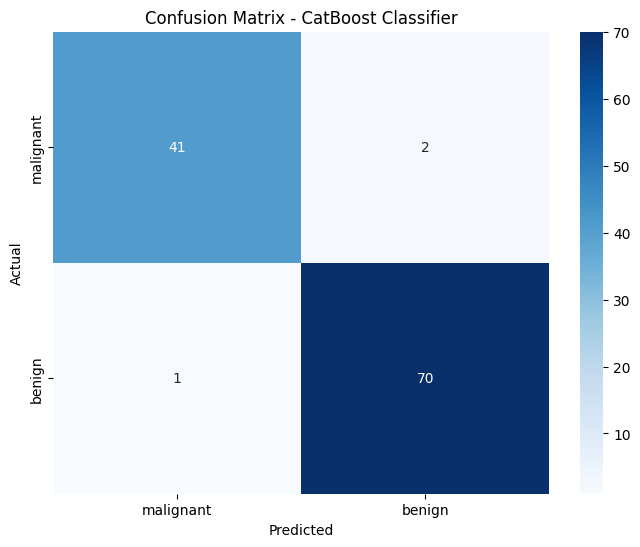

In [14]:
from sklearn.datasets import load_breast_cancer
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

## Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

## Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Initialize CatBoost Classifier
model = CatBoostClassifier(verbose=0, random_state=42)

## Train the model
model.fit(X_train, y_train)

## Predict on test set
y_pred = model.predict(X_test)

## Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

## Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

## Plot confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost Classifier')
plt.show()

10. You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model
(Include your Python code and output in the code box below.)

     -> The step-by-step data science pipeline for a FinTech company trying to predict loan default, using boosting techniques (e.g., XGBoost, CatBoost, or AdaBoost). The problem is a binary classification task with challenges such as:
    
● Imbalanced dataset

● Missing values

● Mixed data types (numeric + categorical)

Step-by-step Pipeline:
 1. Data Preprocessing

● Missing values:

  ● Numerical: Impute with median (robust to outliers)

  ● Categorical: Impute with mode or use models that handle missing natively (like CatBoost)

● Categorical Encoding:

  ● Label encoding or one-hot encoding (XGBoost requires manual encoding; CatBoost can handle categorical variables directly)

● Imbalanced data:

  ● Use scale_pos_weight (XGBoost), class_weights (CatBoost) or resampling techniques like SMOTE, or adjust the loss function.

 2. Model Selection

● CatBoost is preferred due to:

 ● Native handling of categorical variables

 ● Native handling of missing values

 ● Excellent performance on imbalanced datasets

 ● Faster training with less preprocessing

 So, we’ll choose CatBoostClassifier

 3. Hyperparameter Tuning

Use RandomizedSearchCV or Optuna for efficient tuning.

Key parameters:

● iterations

● learning_rate

● depth

● l2_leaf_reg

● scale_pos_weight (to handle imbalance)

 4. Evaluation Metrics

Due to imbalance, use:

● AUC-ROC (good for binary classification)
● F1-score (balances precision & recall)
● Precision & Recall
● Confusion Matrix





In [25]:
## Install catboost if not already installed
## !pip install catboost scikit-learn pandas numpy

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from catboost import CatBoostClassifier, Pool

## Step 1: Load your dataset (replace with actual dataset)
## For demonstration, we'll simulate a small dataset with mixed types
np.random.seed(0)
data = pd.DataFrame({
    'age': np.random.randint(21, 65, 1000),
    'income': np.random.normal(50000, 15000, 1000),
    'employment_status': np.random.choice(['Employed', 'Unemployed', 'Self-employed'], 1000),
    'loan_amount': np.random.normal(10000, 3000, 1000),
    'credit_score': np.random.randint(300, 850, 1000),
    'defaulted': np.random.choice([0, 1], 1000, p=[0.9, 0.1])
})

## Simulate missing values
data.loc[data.sample(frac=0.1).index, 'income'] = np.nan
data.loc[data.sample(frac=0.1).index, 'employment_status'] = np.nan

## Step 2: Handle missing values - Fill missing categorical values
data['employment_status'] = data['employment_status'].fillna('Missing')

## Step 3: Identify categorical features
cat_features = ['employment_status']

## Step 4: Split dataset
X = data.drop('defaulted', axis=1)
y = data['defaulted']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

## Step 5: Define and train CatBoostClassifier
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    verbose=100,
    cat_features=cat_features,
    random_state=42,
    scale_pos_weight=9  # because ~90% are non-default
)

## Train
model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

## Step 6: Predict and evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

0:	test: 0.5063920	best: 0.5063920 (0)	total: 5.66ms	remaining: 2.82s
100:	test: 0.4206913	best: 0.5107718 (2)	total: 286ms	remaining: 1.13s
200:	test: 0.4559659	best: 0.5107718 (2)	total: 592ms	remaining: 880ms
300:	test: 0.4855587	best: 0.5107718 (2)	total: 928ms	remaining: 613ms
400:	test: 0.4798769	best: 0.5107718 (2)	total: 1.25s	remaining: 309ms
499:	test: 0.4713542	best: 0.5107718 (2)	total: 1.57s	remaining: 0us

bestTest = 0.5107717803
bestIteration = 2

Shrink model to first 3 iterations.
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.26      0.40       176
           1       0.12      0.75      0.21        24

    accuracy                           0.32       200
   macro avg       0.50      0.51      0.31       200
weighted avg       0.79      0.32      0.38       200

ROC-AUC Score: 0.5107717803030303
Confusion Matrix:
[[ 46 130]
 [  6  18]]
